In [93]:

import os
os.chdir("/projects/rkumar44/Taxi_Pooling")
!pwd

/projects/rkumar44/Taxi_Pooling


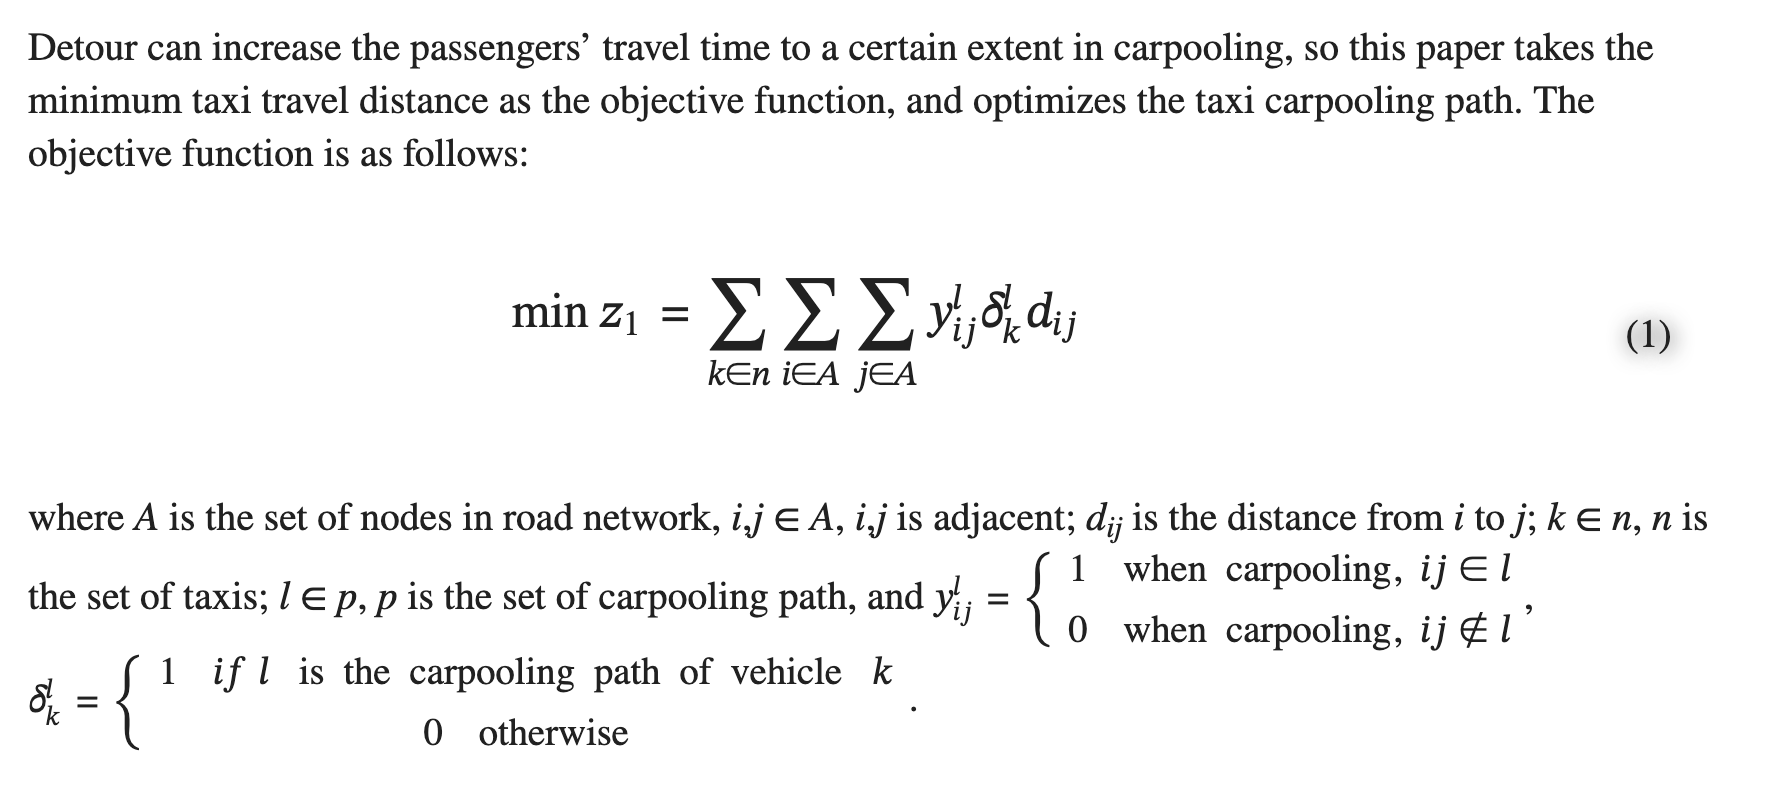

In [1]:
from IPython import display
display.Image("Objective_func.png")

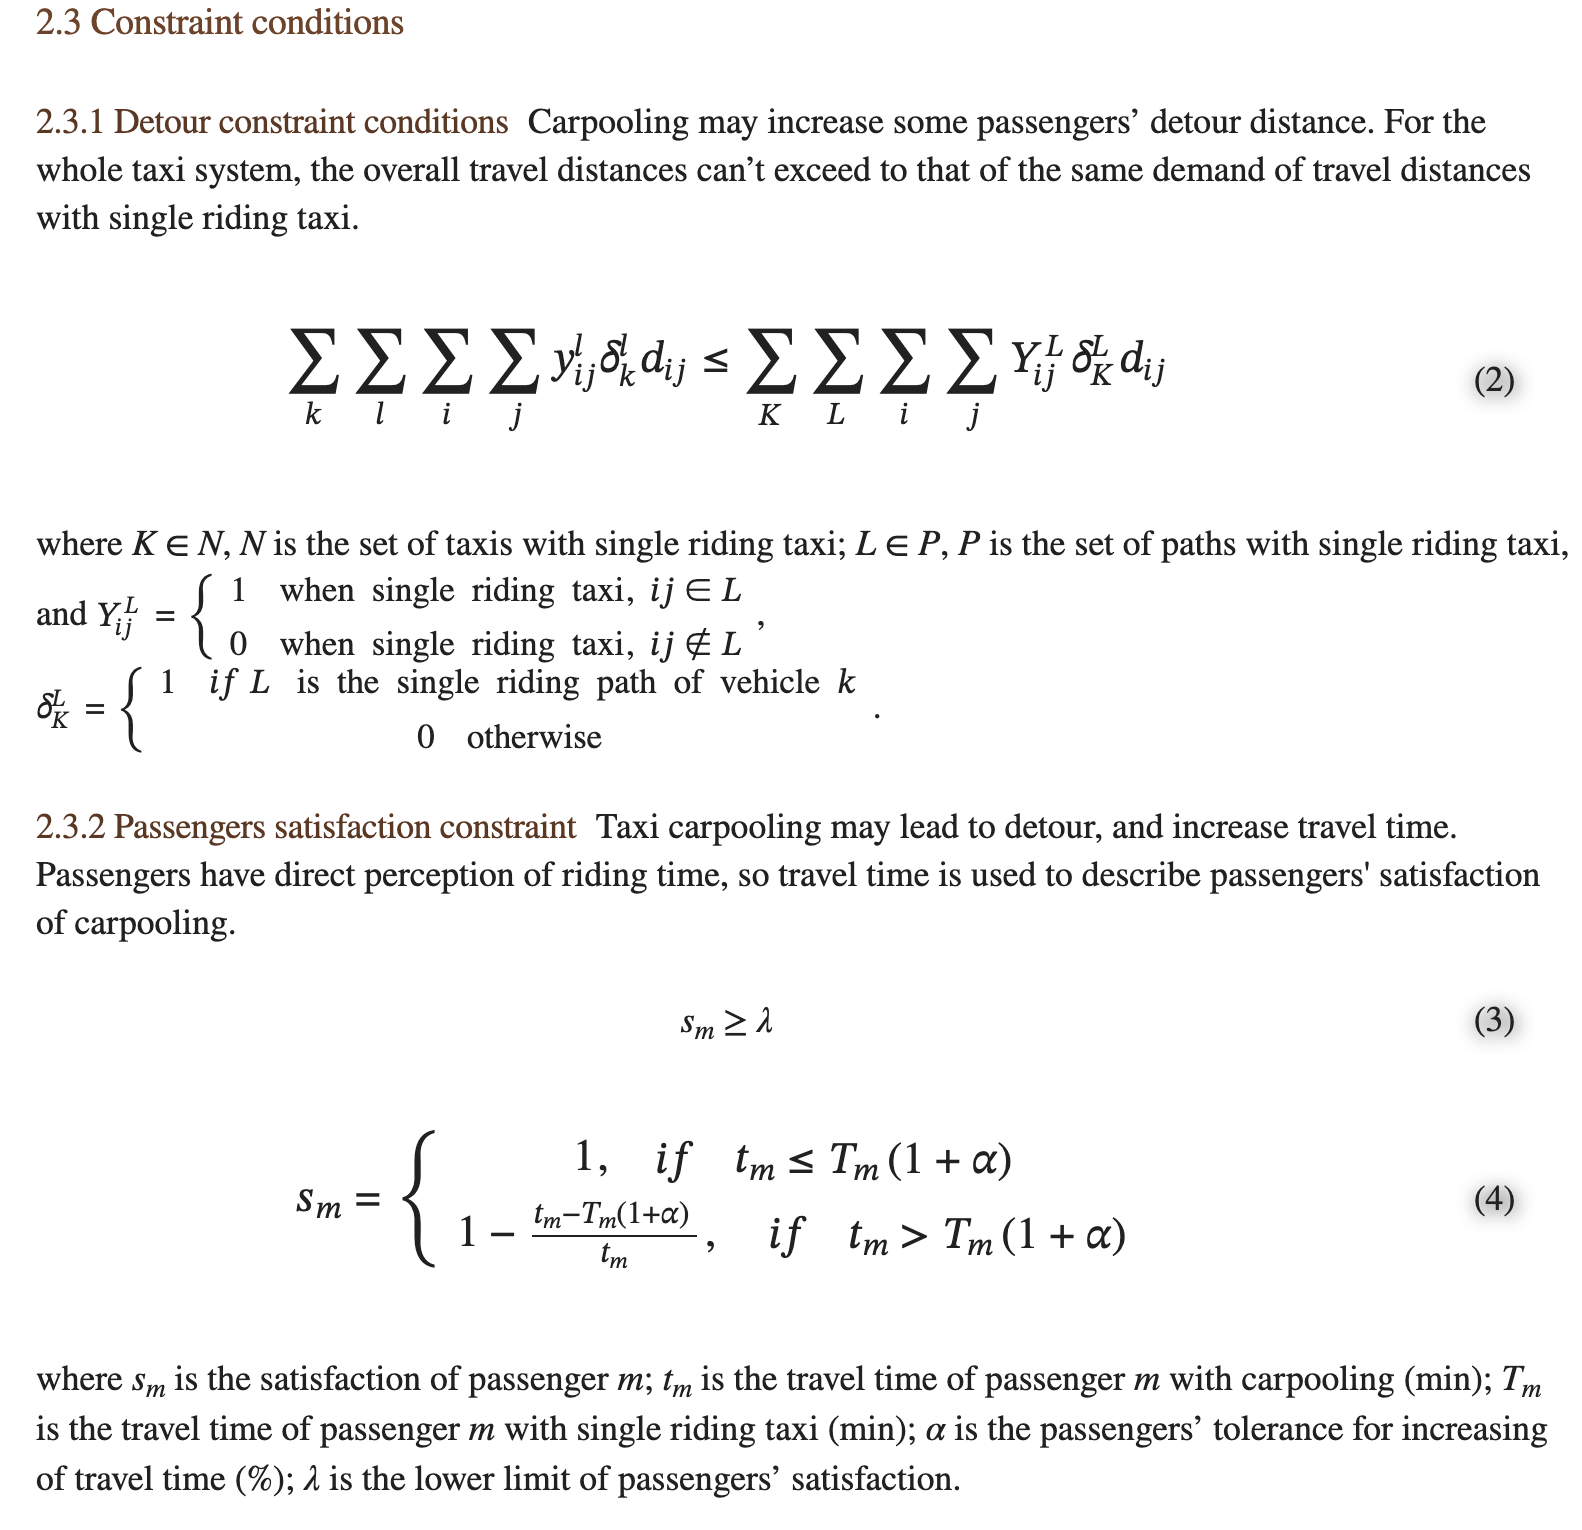

In [2]:
from IPython import display
display.Image("Constraint1.png")

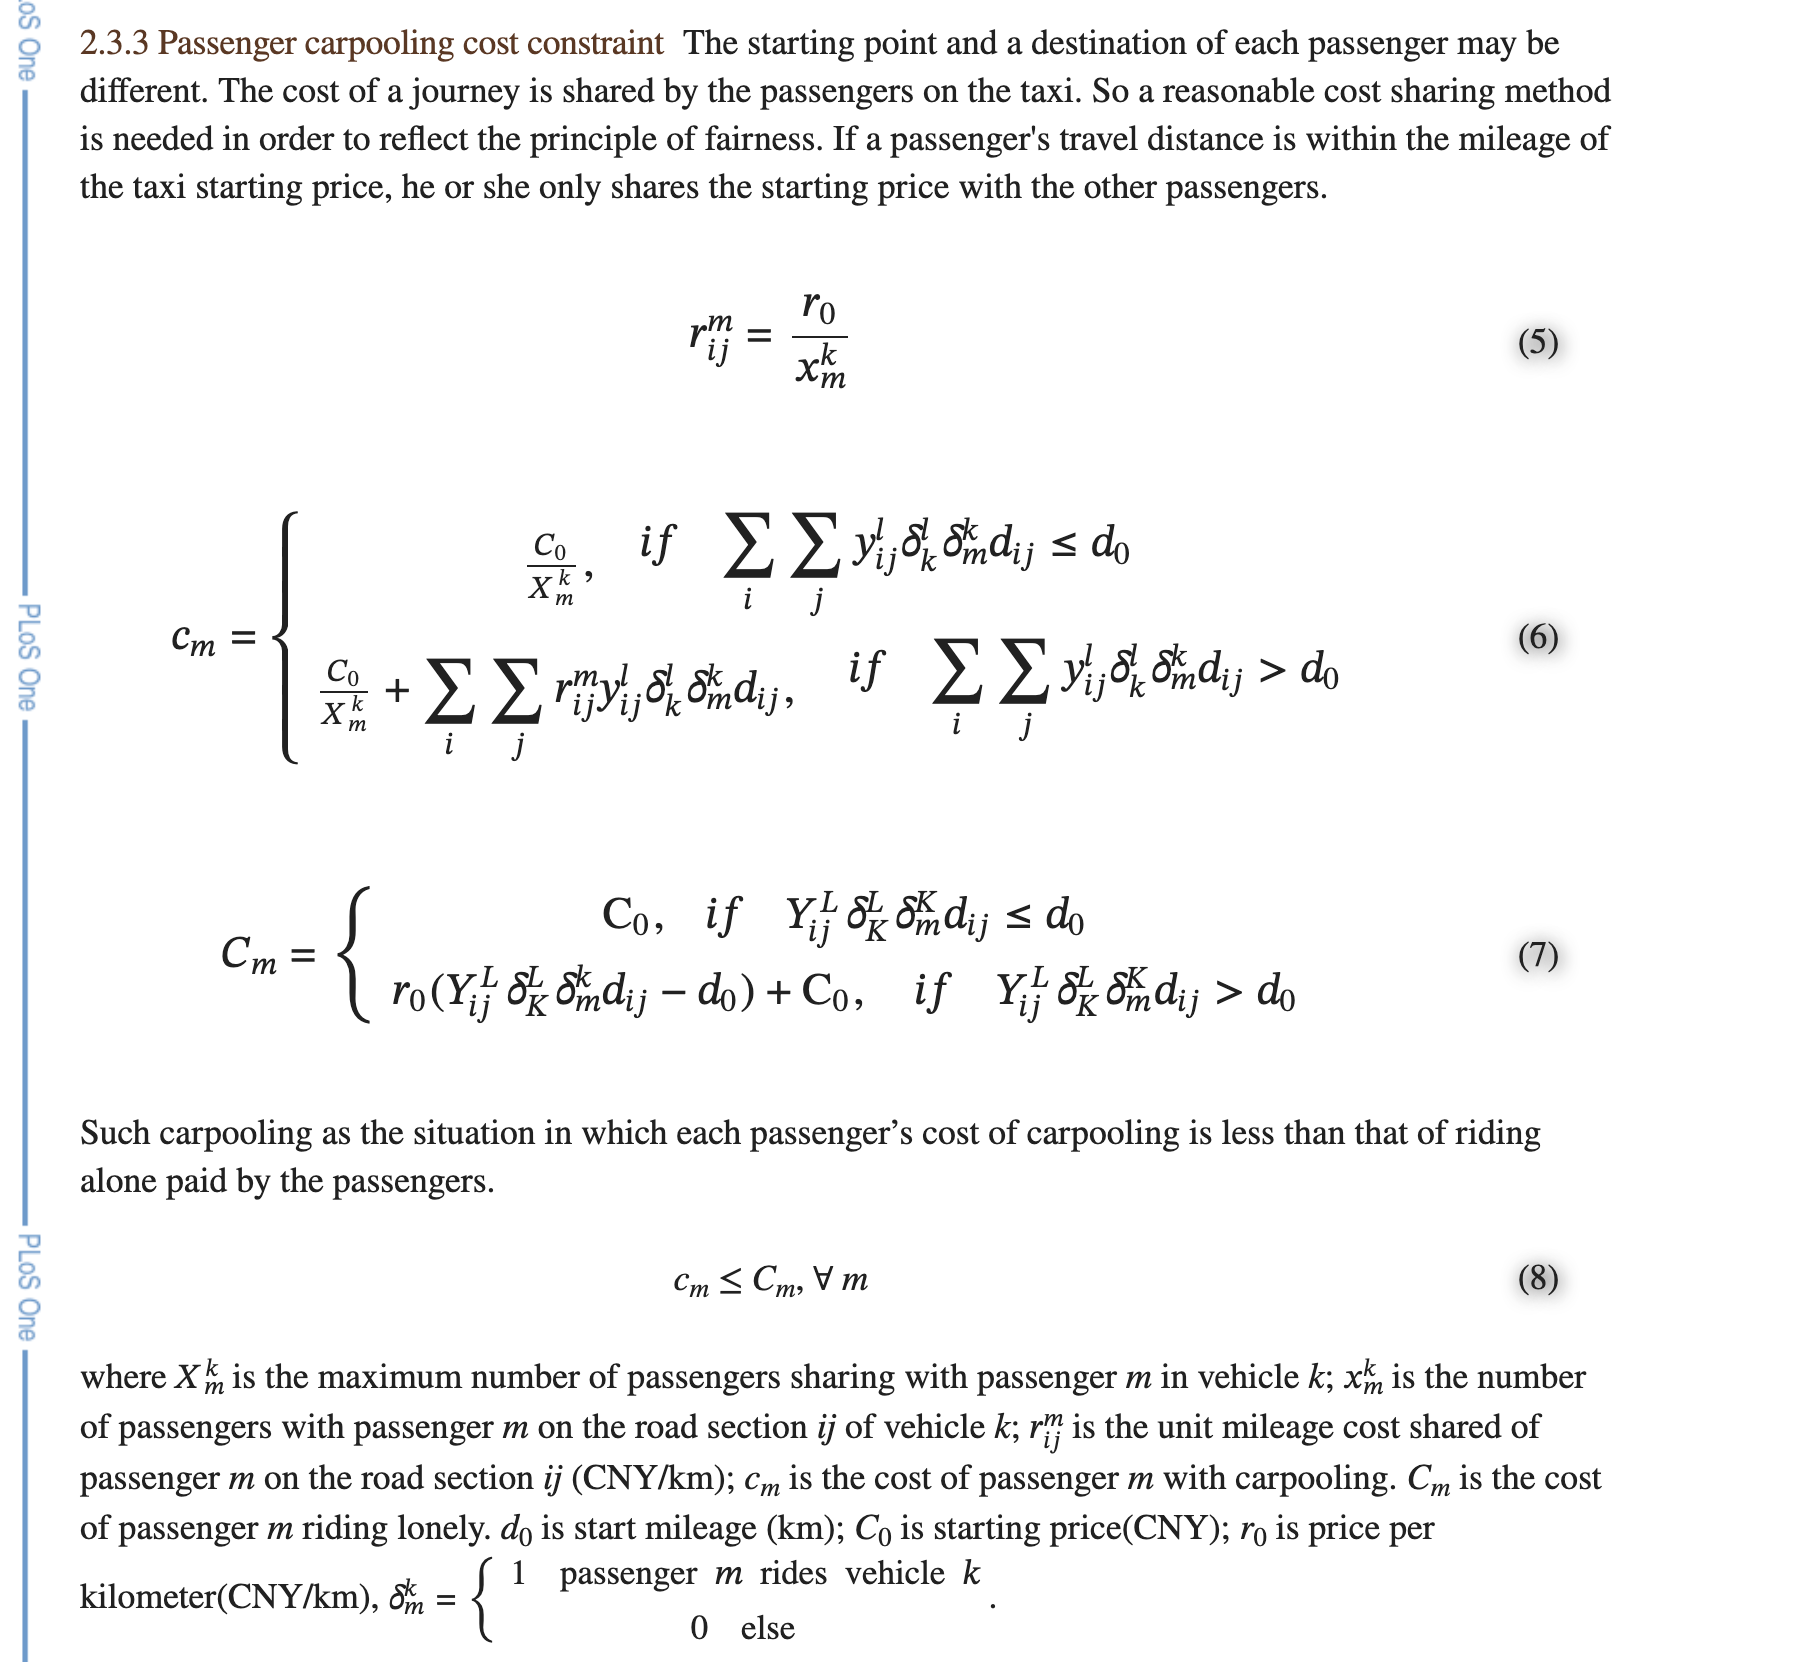

In [3]:
from IPython import display
display.Image("Constraint2.png")

## Path Optimization for Taxi Car Pooling

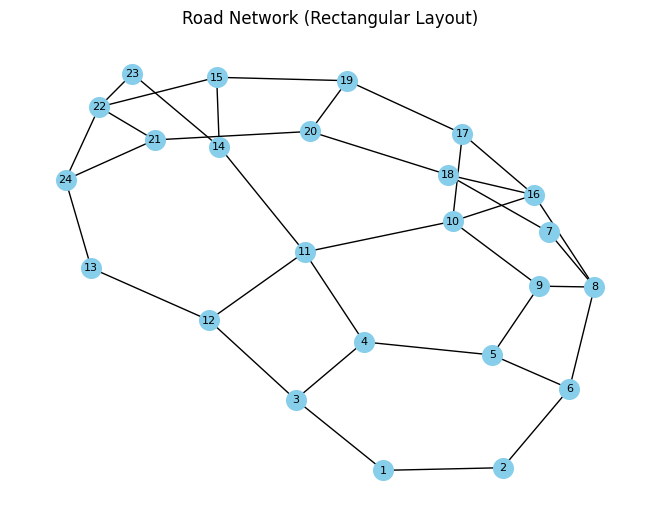

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_road_network():
    # Create an empty graph
    G = nx.Graph()

    # Add 24 nodes to the graph
    for node in range(1,25):
        G.add_node(node)

    # Define edges (connections between nodes)
    edges = [(1, 2),(1,3), (2, 6), (3, 4), (3,12), (4,5),(4,11),(5,6),(5,9),(6,8),(7,8),(7,18),(8,9),(8,16),
            (9, 10),(10,11), (10,16), (10,17), (11,12), (11,14),(12,13),(13,24),(14,15),(14,23),(15,19),(15,22),(16,17),(16,18),
            (17, 19),(18,20), (19,20), (20,21), (21,22), (21,24),(22,23),(22,24)]
    # Add the edges to the graph
    G.add_edges_from(edges)

    # Plot the road network
    pos = nx.spring_layout(G)  # Layout algorithm for positioning the nodes
    
    nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=8)
    plt.title("Road Network (Rectangular Layout)")
    plt.show()
    

# Call the function to plot the road network
plot_road_network()

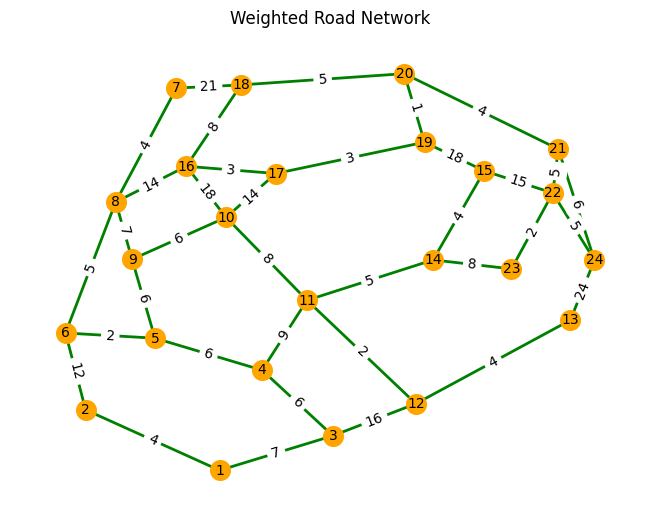

In [250]:
import numpy as np

G = nx.Graph()

# Add 24 nodes to the graph
for node in range(1,25):
    G.add_node(node)

# Define edges (connections between nodes)
edges = [(1, 2),(1,3), (2, 6), (3, 4), (3,12), (4,5),(4,11),(5,6),(5,9),(6,8),(7,8),(7,18),(8,9),(8,16),
        (9, 10),(10,11), (10,16), (10,17), (11,12), (11,14),(12,13),(13,24),(14,15),(14,23),(15,19),(15,22),(16,17),(16,18),
        (17, 19),(18,20), (19,20), (20,21), (21,22), (21,24),(22,23),(22,24)]


edge_weight={(1, 2):4,(1, 3):7,(2, 6):12,(3, 4):6, 
 (3, 12):16,(4, 5):6,(4, 11):9,(5, 6):2,(5, 9):6,(6, 8):5,(7, 8):4,(7, 18):21,(8, 9):7,
 (8, 16):14,(9, 10):6,(10,11):8, (10,16):18,(10,17):14, (11,12):2, (11,14):5,(12,13):4,
 (13,24):24,(14,15):4,(14,23):8,(15,19):18,(15,22):15,(16,17):3,(16,18):8,(17,19):3,(18,20):5,
 (19,20):1,(20,21):4,(21,22):5,(21,24):6,(22,23):2,(22,24):5}

    
for edge in edges:
    weight = edge_weight[edge] 
    G.add_edge(edge[0], edge[1], weight=weight)
    
# for edge in edges:
#     weight = int(abs(np.random.normal(7, 30)))  # Random weight 
#     G.add_edge(edge[0], edge[1], weight=weight)
    
edge_weights = nx.get_edge_attributes(G, 'weight')

#Plot the weighted road network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color='orange', font_size=10, width=2, edge_color='green')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)
plt.title("Weighted Road Network")
plt.show()

In [ ]:
214 {'2_5_1': (63, [1, 2, 6, 5, 4, 11, 14, 23, 22, 24, 21, 20])}  (2,6,1)(24,14,20)
221 {'8_7_4': (56, [3, 4, 5, 9, 10, 16, 18, 20, 19, 17])}         (10,5,3)(18,16,17)
216 {'6_3_9': (61, [19, 20, 21, 22, 23, 14, 11, 10, 9, 5, 4, 3, 1])} (22,21,19)(4,9,1)

225 {'1_3_2': (58, [3, 1, 2, 6, 8, 16, 17, 19, 20, 21, 22])}
246 {'8_9_7': (37, [24, 22, 23, 14, 11, 4, 5, 6])}
239 {'6_4_5': (44, [4, 5, 6, 8, 16, 18, 20, 19, 17])}

225 {'1_5_2': (58, [2, 1, 3, 4, 5, 6, 8, 16, 18, 20, 21])}
237 {'6_4_3': (46, [3, 4, 5, 6, 8, 16, 17, 19, 20, 21, 22])}
246 {'9_8_7': (37, [24, 22, 23, 14, 11, 4, 5, 6])}

In [223]:
58+37+46

141

In [188]:
passenger

{1: [1, 20],
 2: [2, 21],
 3: [3, 22],
 4: [4, 17],
 5: [5, 18],
 6: [6, 19],
 7: [22, 4],
 8: [23, 5],
 9: [24, 6]}

## Utility Functions

In [228]:

def path_distance(G,all_paths):
    path_weights = []
    for path in all_paths:
        weight = sum(G[u][v]['weight'] for u, v in zip(path, path[1:]))
        path_weights.append((path, weight))
    return path_weights



def isSubsequence(s,t):
        i,j=0,0

        while i<len(s) and j<len(t):
            while i<len(s) and j<len(t) and s[i]!=t[j]:
                j+=1
            if i<len(s) and j<len(t) and s[i]==t[j]:
                i+=1
                j+=1
        return True if i==len(s) else False
    
    
def random_int_exclude(range_start, range_end, exclude_number):
    while True:
        random_num = random.randint(range_start, range_end)
        if random_num != exclude_number:
            return random_num


In [132]:
passenger={1:[1,20],
          2:[2,24],
          3:[21,9],
          4:[3,17],
          5:[6,14],
          6:[22,4],
          7:[5,16],
          8:[10,18],
          9:[19,1]}
passenger

{1: [1, 20],
 2: [2, 24],
 3: [21, 9],
 4: [3, 17],
 5: [6, 14],
 6: [22, 4],
 7: [5, 16],
 8: [10, 18],
 9: [19, 1]}

In [229]:
passenger={1:[1,20],
          2:[2,21],
          3:[3,22],
          4:[4,17],
          5:[5,18],
          6:[6,19],
          7:[22,4],
          8:[23,5],
          9:[24,6]}
passenger

{1: [1, 20],
 2: [2, 21],
 3: [3, 22],
 4: [4, 17],
 5: [5, 18],
 6: [6, 19],
 7: [22, 4],
 8: [23, 5],
 9: [24, 6]}

In [230]:
import math
no_passengers=len([p for p in passenger.keys()])
taxi_capacity=3
no_taxi_required=math.ceil(no_passengers/3)


print(no_taxi_required)

3


In [231]:
Single_Ride={}
for p_id,p_s_d in passenger.items():
    source_node=p_s_d[0]
    destination_node=p_s_d[1]
    
    all_paths = list(nx.all_simple_paths(G, source=source_node, target=destination_node))
    
    path_weights=path_distance(G,all_paths)
    
    min_distance=float('inf')
    optimal_path=[]
    for path, distance in path_weights:
        if distance<min_distance:
            min_distance=distance
            optimal_path=path

    Single_Ride[p_id]=(min_distance,optimal_path)
    
    
Single_Ride

{1: (42, [1, 2, 6, 8, 16, 17, 19, 20]),
 2: (42, [2, 6, 8, 16, 17, 19, 20, 21]),
 3: (30, [3, 4, 11, 14, 23, 22]),
 4: (30, [4, 5, 6, 8, 16, 17]),
 5: (29, [5, 6, 8, 16, 18]),
 6: (25, [6, 8, 16, 17, 19]),
 7: (24, [22, 23, 14, 11, 4]),
 8: (28, [23, 14, 11, 4, 5]),
 9: (36, [24, 21, 20, 19, 17, 16, 8, 6])}

In [232]:
d_sum=0
for k,v in Single_Ride.items():
    d_sum+=v[0]
d_sum

286

## Fitness Function

In [233]:
#Fitness_function

def Fitness(passenger_list):
    
    source_dest_nodes=[]
    all_paths_across_passenger=[]

    for p_id in passenger_list:
        source_node=passenger[p_id][0]
        destination_node=passenger[p_id][1]

        source_dest_nodes.append(source_node)
        source_dest_nodes.append(destination_node)

        all_paths = list(nx.all_simple_paths(G, source=source_node, target=destination_node))

        all_paths_across_passenger.extend(all_paths)


    # find all possible paths for passenger group
    possible_paths=[]
    for path in all_paths_across_passenger:
        flag=True
        for i in range(0,len(source_dest_nodes),2):
            temp_flag=isSubsequence(source_dest_nodes[i:i+2],path)
            flag=flag&temp_flag
    
        if flag==True:
            possible_paths.append(path)
            
    detour_distance=detour_contraints(passenger_list)
    
    possible_paths_PC=[]
    for path in possible_paths:
        PC_Flag=PassengerCost_contraints(passenger_list,path,Mileage_distance=3,Co=500,ro=80)
        if PC_Flag==True:
            possible_paths_PC.append(path)
    
    
    
    if possible_paths_PC:
        
       
        Ride={}       
        path_weights=path_distance(G,possible_paths_PC)

        min_distance=float('inf')
        optimal_path=[]
        for path, distance in path_weights:
            if distance<=detour_distance:
                if distance<min_distance:
                    min_distance,optimal_path=distance,path

        passenger_list=[str(p) for p in passenger_list]
        passenger_comb="_".join(passenger_list)

       
        Ride[passenger_comb]=(min_distance,optimal_path)
        
        
    else:
        return 0,{}
   
    return  d_sum-min_distance if d_sum-min_distance>0 else 0,Ride


## Constraints Function

#### DeTour Constraint

In [234]:
#Constraints_functions

def detour_contraints(passenger_list):
    Single_ride_sum=0
    for p_id in passenger_list:
        Single_ride_sum+=Single_Ride[p_id][0]
    return Single_ride_sum

detour_contraints([1,2,3])


114

#### Passenger Cost Constraint

In [235]:

def SingleRide_PassengerCost(passenger_list,Mileage_distance,Co=500,ro=80):
    Single_Ride_Cost=[]
    for p_id in passenger_list:
        distance=Single_Ride[p_id][0]
        #print(distance)
        
        if distance<=Mileage_distance:
            Cm=Co
        else:
            Cm=Co+(distance-Mileage_distance)*ro

        Single_Ride_Cost.append(Cm)
    return Single_Ride_Cost
        


def PoolRide_PassengerCost(passenger_list,path,Mileage_distance=5,Co=500,ro=80):
    
    Pool_Ride_Cost,passenger_boarded=[],{}
    source_nodes,destination_nodes=[],[]
    for p_id in passenger_list:
            source_node=passenger[p_id][0]
            destination_node=passenger[p_id][1]
            source_nodes.append(source_node)
            destination_nodes.append(destination_node)

    no_passenger_boarded=0
    for node in path:
        if node in source_nodes:
            no_passenger_boarded+=1
            passenger_boarded[node]=no_passenger_boarded
        elif node in destination_nodes:
            no_passenger_boarded-=1
            passenger_boarded[node]=no_passenger_boarded
        else:
            passenger_boarded[node]=no_passenger_boarded
            

    #print(passenger_boarded)

    for p_id in passenger_list:
        #print(p_id)
        source_node=passenger[p_id][0]
        destination_node=passenger[p_id][1]
        source_idx,destination_idx=path.index(source_node),path.index(destination_node)

        subpath = path[source_idx:destination_idx+1].copy()

        distance = sum(G[u][v]['weight'] for u, v in zip(subpath, subpath[1:]))
        #print(subpath,distance)
        Xm=max([passenger_boarded[n] for n in subpath])
        
        if distance<=Mileage_distance:
                Cm= Co/Xm
        else:
            
            differential_path_cost=[]
            for i in range(len(subpath)-1):
                u,v=subpath[i],subpath[i+1]
                if u in passenger_boarded:
                    passenger_count=passenger_boarded[u]
                #print(u,v,passenger_count)
                dij=G[u][v]['weight']
                
                #print(diff_distance,passenger_count)

                rijm=ro/passenger_count
                path_wise_cost=rijm*dij
                differential_path_cost.append(path_wise_cost)
                #print((u,v,dij,rijm),path_wise_cost)

            Cm=(Co/Xm)+ sum(differential_path_cost)
            #print(differential_path_cost,Cm)
        Pool_Ride_Cost.append(Cm)

    return Pool_Ride_Cost

passenger_list , path= [1,3,2],[3, 1, 2, 6, 8, 16, 17, 19, 20, 21, 22]

print(SingleRide_PassengerCost(passenger_list,Mileage_distance=10,Co=500,ro=70))
print(PoolRide_PassengerCost(passenger_list,path,Mileage_distance=10,Co=500,ro=70))


[2740, 1900, 2740]
[1193.3333333333333, 2173.3333333333335, 1193.3333333333333]


In [218]:
sum([2740, 1830, 2740])
#sum([1578.3333333333335, 843.3333333333333, 2138.3333333333335])
#sum([1193.3333333333333, 2173.3333333333335, 1193.3333333333333])

7310

In [236]:
def PassengerCost_contraints(passenger_list,path,Mileage_distance=3,Co=500,ro=80):
    
    single_ride=SingleRide_PassengerCost(passenger_list,Mileage_distance,Co,ro)
    pool_ride=PoolRide_PassengerCost(passenger_list,path,Mileage_distance,Co,ro)
    res=True
    for i in range(len(single_ride)):
        flag=pool_ride[i]<=single_ride[i]
        res= res & flag
    return res

# passenger_list,path=[6,3,9],[19, 20, 21, 22, 23, 14, 11, 10, 9, 5, 4, 3, 1]
# PassengerCost_contraints(passenger_list,path)

In [ ]:
214 {'2_5_1': (63, [1, 2, 6, 5, 4, 11, 14, 23, 22, 24, 21, 20])}
221 {'8_7_4': (56, [3, 4, 5, 9, 10, 16, 18, 20, 19, 17])}
216 {'6_3_9': (61, [19, 20, 21, 22, 23, 14, 11, 10, 9, 5, 4, 3, 1])}

In [237]:
passenger_list=[6,3,9]
source_dest_nodes=[]
all_paths_across_passenger=[]

for p_id in passenger_list:
    source_node=passenger[p_id][0]
    destination_node=passenger[p_id][1]

    source_dest_nodes.append(source_node)
    source_dest_nodes.append(destination_node)

    all_paths = list(nx.all_simple_paths(G, source=source_node, target=destination_node))

    all_paths_across_passenger.extend(all_paths)


# find all possible paths for passenger group
possible_paths=[]
for path in all_paths_across_passenger:
    flag=True
    for i in range(0,len(source_dest_nodes),2):
        temp_flag=isSubsequence(source_dest_nodes[i:i+2],path)
        flag=flag&temp_flag

    if flag==True:
        possible_paths.append(path)

detour_distance=detour_contraints(passenger_list)

#PassengerCost_contraints(passenger_list,path,Mileage_distance=10,Co=500,ro=75)

possible_paths_PC=[]
for path in possible_paths:
    PC_Flag=PassengerCost_contraints(passenger_list,path,Mileage_distance=5,Co=500,ro=80)
    if PC_Flag==True:
        possible_paths_PC.append(path)
        
        
if possible_paths_PC:
    print(len(possible_paths_PC))
    

#     Ride={}       
#     path_weights=path_distance(G,possible_paths)

#     min_distance=float('inf')
#     optimal_path=[]
#     for path, distance in path_weights:
#         if distance<=detour_distance:
#             if distance<min_distance:
#                 min_distance,optimal_path=distance,path

#     passenger_list=[str(p) for p in passenger_list]
#     passenger_comb="_".join(passenger_list)


#     Ride[passenger_comb]=(min_distance,optimal_path)

In [156]:
possible_paths_PC

[[19, 20, 21, 22, 15, 14, 11, 10, 9, 5, 4, 3, 1],
 [19, 20, 21, 22, 15, 14, 11, 10, 9, 8, 6, 5, 4, 3, 1],
 [19, 20, 21, 22, 23, 14, 11, 10, 9, 5, 4, 3, 1],
 [19, 20, 21, 22, 23, 14, 11, 10, 9, 8, 6, 5, 4, 3, 1],
 [19, 20, 21, 22, 24, 13, 12, 11, 10, 9, 5, 4, 3, 1],
 [19, 20, 21, 24, 22, 15, 14, 11, 10, 9, 5, 4, 3, 1],
 [19, 20, 21, 24, 22, 23, 14, 11, 10, 9, 5, 4, 3, 1],
 [19, 20, 21, 24, 22, 23, 14, 11, 10, 9, 8, 6, 5, 4, 3, 1]]

In [142]:
221 {'7_8_4': (56, [3, 4, 5, 9, 10, 16, 18, 20, 19, 17])}
214 {'2_5_1': (63, [1, 2, 6, 5, 4, 11, 14, 23, 22, 24, 21, 20])}
216 {'6_3_9': (61, [19, 20, 21, 22, 23, 14, 11, 10, 9, 5, 4, 3, 1])}

{'5_3_9': (inf, [])}

In [143]:
passenger

{1: [1, 20],
 2: [2, 24],
 3: [21, 9],
 4: [3, 17],
 5: [6, 14],
 6: [22, 4],
 7: [5, 16],
 8: [10, 18],
 9: [19, 1]}

In [221]:
inp_pass_list=[1,3,2]
min_distance,Ride=Fitness(inp_pass_list)
print(detour_contraints(inp_pass_list))
print(min_distance,Ride)

111
214 {'1_3_2': (69, [1, 2, 6, 5, 4, 3, 12, 11, 14, 23, 22, 21, 20])}


In [145]:
len(possible_paths)

440

In [146]:
min_distance,Ride=Fitness([3,7,6])
min_distance,Ride

(0, {'3_7_6': (inf, [])})

## Genetic Algorithm

In [238]:
import random

# Define parameters
population_size = 100
chromosome_length = 9
crossover_probability = 0.9
mutation_probability = 0.3
max_generations = 10

# Define the evaluation function (F(i))
def evaluate(chromosome):
    # Your fitness function logic here
    segment_minimum_dist=[]
    for i in range(0,len(chromosome),taxi_capacity):
        inp_pass_list=chromosome[i:i+taxi_capacity]
        #print(inp_pass_list)
        min_distance,Ride=Fitness(inp_pass_list)
        segment_minimum_dist.append(min_distance)
    #print(segment_minimum_dist,sum(segment_minimum_dist))
    return sum(segment_minimum_dist)


# Create an initial population with random chromosomes
genes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
population = [random.sample(genes, k=chromosome_length) for _ in range(population_size)]
fitness_details=[]
for generation in range(max_generations):
    # Evaluate the population
    evaluated_population= [(chromosome, evaluate(chromosome)) for chromosome in population]
    
    # Sort the population by fitness (in descending order)
    evaluated_population.sort(key=lambda x: x[1], reverse=True)
    
    best_chromosome, best_fitness = max(evaluated_population, key=lambda x: x[1])
    fitness_details.append((best_chromosome, best_fitness))
    
    # Calculate cumulative probabilities (qi) for selection
    total_fitness = sum(fitness for _, fitness in evaluated_population)
    
    cumulative_probabilities = [sum(x[1] / total_fitness for x in evaluated_population[:i+1]) for i in range(population_size)]
    
    
    new_population = []
    
    # Select individuals for the next generation using roulette wheel selection
    for _ in range(population_size):
        r = random.random()
        for i, q in enumerate(cumulative_probabilities):
            if r <= q:
                new_population.append(evaluated_population[i][0].copy())
                break
                
    # Crossover
    for i in range(0, population_size, 2):
        if random.random() < crossover_probability:
            crossover_point  = random.randint(0, chromosome_length - 1)
            transition_point = random_int_exclude(0, chromosome_length - 1, crossover_point)

            new_population[i][crossover_point],new_population[i][transition_point]=new_population[i][transition_point],new_population[i][crossover_point]
            new_population[i+1][crossover_point],new_population[i+1][transition_point]=new_population[i+1][transition_point],new_population[i+1][crossover_point]

            
    # Mutate individuals
    for i in range(population_size):
     
        if  random.random()< mutation_probability:
            #print(r)
            mutation_point1 = random.randint(0, chromosome_length - 1)
            mutation_point2 = random.randint(0, chromosome_length - 1)
            
            if mutation_point1!=mutation_point2:
                new_population[i][mutation_point1],new_population[i][mutation_point2]=new_population[i][mutation_point2],new_population[i][mutation_point1]
                    
    population = new_population

    
# Get the best individual after the final generation
best_chromosome, best_fitness = max(evaluated_population, key=lambda x: x[1])

print("Best Chromosome:", best_chromosome)
print("Best Fitness:", best_fitness)


Best Chromosome: [7, 9, 8, 3, 2, 1, 5, 4, 6]
Best Fitness: 719


In [16]:
evaluate([3, 6, 9, 1, 4, 8, 2, 7, 5])

578

In [240]:
for i in range(0,len(best_chromosome),3):
    min_distance,Ride=Fitness(best_chromosome[i:i+3])
    print(min_distance,Ride)

249 {'7_9_8': (37, [24, 22, 23, 14, 11, 4, 5, 6])}
228 {'3_2_1': (58, [3, 1, 2, 6, 8, 16, 17, 19, 20, 21, 22])}
242 {'5_4_6': (44, [4, 5, 6, 8, 16, 18, 20, 19, 17])}


In [241]:
print(detour_contraints([1,2,3]))
print(detour_contraints([4,5,6]))
print(detour_contraints([7,8,9]))

114
84
88


## Plotting Single Objective Function

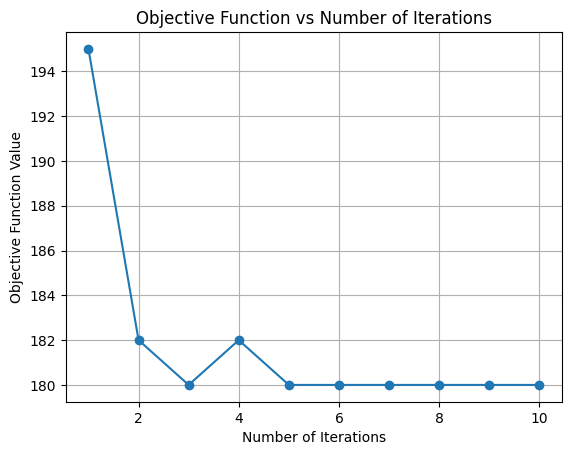

In [149]:
import matplotlib.pyplot as plt

# Sample data: a list of objective function values
objective_function_values = [(d_sum*3)-fitness for ride, fitness in fitness_details]

# Create a list of iteration numbers based on the length of the data
iterations = range(1, len(objective_function_values) + 1)

# Plot the objective function values against the number of iterations
plt.plot(iterations, objective_function_values, marker='o', linestyle='-')
plt.xlabel('Number of Iterations')
plt.ylabel('Objective Function Value')
plt.title('Objective Function vs Number of Iterations')
plt.grid(True)

# Display the plot (you may need to save it to a file if you're running the script outside of an interactive environment)
plt.show()

In [256]:
ix = torch.randint(1000 - 8, (4,))


In [252]:
import torch

In [257]:
ix

tensor([145, 423, 948, 706])

In [259]:
calibrated_probabilities

[[0.1, 0.2, 0.3, 0.4, 0.5], [0.6, 0.7, 0.8, 0.9, 0.95]]